In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats 




In [11]:
oncesi=pd.DataFrame([123,119,119,116,123,121,120,117,118,121,121,123,119,121,118,124,121,125,115,115,119,118,121,117,117,120,120,121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi=pd.DataFrame([143,159,139,126,128,124,120,157,198,121,121,123,119,121,118,124,121,125,115,115,119,118,121,117,117,120,120,129,147,138,147,103,168,144,101,185,158,135,105])


In [3]:
oncesi[0:10]

,0
0,123
1,119
2,119
3,116
4,123
5,121
6,120
7,117
8,118
9,121


In [13]:
sonrasi[0:10]

,0
0,143
1,159
2,139
3,126
4,128
5,124
6,120
7,157
8,198
9,121


In [14]:
#birinci veri seti 
ayrik=pd.concat([oncesi,sonrasi],axis=1)
ayrik.columns=["oncesi","sonrasi"]
print("'ayrik' veri seti\n\n", ayrik.head(),"\n\n")



#ikinci veri seti
#oncesi flag/tag
grup_oncesi=np.arange(len(oncesi))
grup_oncesi=pd.DataFrame(grup_oncesi)
grup_oncesi[:]="oncesi"

#flag oncesş değerleri 
A=pd.concat([oncesi,grup_oncesi],axis=1)
#sonrası
grup_sonrasi=np.arange(len(sonrasi))
grup_sonrasi=pd.DataFrame(grup_sonrasi)
grup_sonrasi[:]="sonrasi"

B=pd.concat([sonrasi,grup_sonrasi],axis=1)
#bırlıkte
birlikte=pd.concat([A,B])
birlikte

birlikte.columns=["performans","oncesi_sonrasi"]

print("'birlikte' veri seti:\n\n",birlikte.head(),"\n")






'ayrik' veri seti

    oncesi  sonrasi
0     123      143
1     119      159
2     119      139
3     116      126
4     123      128 


'birlikte' veri seti:

    performans oncesi_sonrasi
0         123         oncesi
1         119         oncesi
2         119         oncesi
3         116         oncesi
4         123         oncesi 



<Axes: xlabel='oncesi_sonrasi', ylabel='performans'>

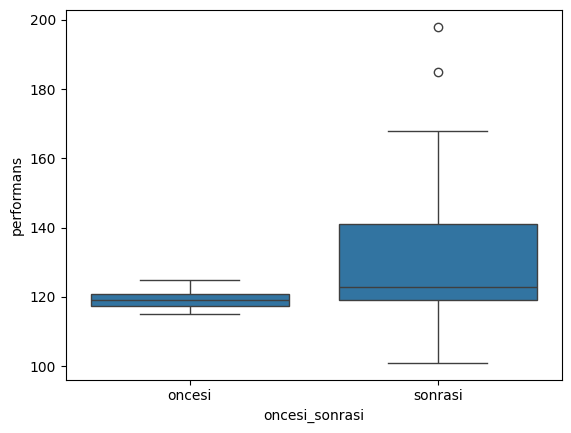

In [15]:
import seaborn as sns 
sns.boxplot(x="oncesi_sonrasi",y="performans",data=birlikte)

In [16]:
# varsayim
from scipy.stats import shapiro

In [17]:
shapiro(ayrik.oncesi)

ShapiroResult(statistic=0.9546045701366049, pvalue=0.11749599605827593)

In [18]:
shapiro(ayrik.sonrasi)

ShapiroResult(statistic=0.8599041623996415, pvalue=0.0001886341934228699)

In [19]:
stats.levene(ayrik.oncesi,ayrik.sonrasi)

LeveneResult(statistic=18.86973137012476, pvalue=4.272881478873373e-05)

In [20]:
#hipotez testi
stats.ttest_rel(ayrik.oncesi,ayrik.sonrasi)

TtestResult(statistic=-3.2725326187796786, pvalue=0.0022738878250235382, df=38)

In [22]:
test_istatigi,pvalue=stats.ttest_rel(ayrik["oncesi"],ayrik["sonrasi"])
print("test istaği=%.5f,degeri=%.5f"% (test_istatigi,pvalue))

test istaği=-3.27253,degeri=0.00227


In [23]:
#nonparametrik bağımlı iki örneklem testi 

In [24]:
stats.wilcoxon(ayrik.oncesi,ayrik.sonrasi)

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


WilcoxonResult(statistic=24.0, pvalue=0.0024005494409970823)

In [26]:
test_istatigi,pvalue=stats.wilcoxon(ayrik["oncesi"],ayrik["sonrasi"])
print("test istaği=%.4f,degeri=%.4f"% (test_istatigi,pvalue))

test istaği=24.0000,degeri=0.0024
